In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from config import viz_param

### Make figures for VI

/tmp/ipykernel_60638/235750383.py:50: RuntimeWarning: Mean of empty slice.
  plt.plot(range(0, len(rf_vi.mean(axis=0))), rf_vi.mean(axis=0), label="Rainfed Olives")
/media/workspace/linchenxi/home/satellite-platform/venv/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


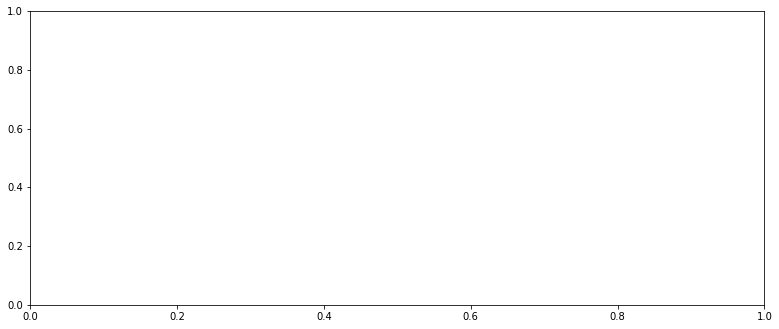

In [3]:
root_dir =  f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis"
VI = "OSAVI" 
for region in ["Guercif", "Fes", "Taza", "Taounate", "Sefrou", "Yacoub"]:
    samples = pd.DataFrame(data=[])
    for year in range(2012, 2023):
        new_name = {f"{VI}_{i}":f"{VI}_{i+(year-2012)*12}" for i in range(1, 13)}
        try:
            irri = pd.read_csv(os.path.join(root_dir, f"{VI}", f"{region}_{VI}_irri_{year}.csv"))[[f"{VI}_{i}" for i in range(1, 13)]]
        except:
            irri = pd.DataFrame(data=[], columns=[f"{VI}_{i}" for i in range(1, 13)])
        irri.rename(columns=new_name, inplace=True)
        irri = irri.fillna(0)
        try:
            rf = pd.read_csv(os.path.join(root_dir, f"{VI}", f"{region}_{VI}_rf_{year}.csv"))[[f"{VI}_{i}" for i in range(1, 13)]]
        except:        
            rf = pd.DataFrame(data=[], columns=[f"{VI}_{i}" for i in range(1, 12)])
        rf.rename(columns=new_name, inplace=True)
        rf = rf.fillna(0)
        if year == 2012:
            irri["class"] = 0
            rf["class"] = 1
        combined = pd.concat([irri, rf], axis=0)
        samples = pd.concat([samples, combined], axis=1)
    irri_vi = samples[samples["class"]==0].drop(columns=["class"]).to_numpy()
    rf_vi = samples[samples["class"]==1].drop(columns=["class"]).to_numpy()
    fig = plt.figure(1, figsize=(12, 6))
    plt.plot(range(0, len(irri_vi.mean(axis=0))), irri_vi.mean(axis=0), label= "Irrigated Olives")
    plt.plot(range(0, len(rf_vi.mean(axis=0))), rf_vi.mean(axis=0), label="Rainfed Olives")
    ax = plt.gca()
    for l in ax.get_xticklabels() + ax.get_yticklabels():
        l.set_size(14)
        l.set_family('Arial')
        l.set_weight('bold')
    # ax.set_facecolor(np.array([230, 230, 230])/255)
    plt.legend(loc=4, prop=dict(size=14, family='Arial', weight='bold'))
    ax.set_ylabel(f"{VI}", fontdict=dict(size=14, family='Arial', weight='bold'))
    ax.set_xlabel('Dates', fontdict=dict(size=14, family='Arial', weight='bold'))
    # ax.set_xlabel('Precipitation(mm)', fontdict=dict(size=14, family='Arial', weight='bold'))
    ax.set_xticks([0, 24, 48, 72, 96, 120])
    ax.set_ylim(viz_param[VI]["ylim"][0], viz_param[VI]["ylim"][1])
    ax.set_yticks(viz_param[VI]["yticks"])
    ax.set_xticklabels(["2012-01", "2014-01", "2016-01", "2018-01", "2020-01", "2022-01"], rotation=45)
    ax.grid(ls='--', color='k', lw=0.5)
    plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95)
    plt.savefig(fr"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/figures/{region}_{VI}.jpg")
    plt.cla()
    # plt.show()

### Make figures for precipitation

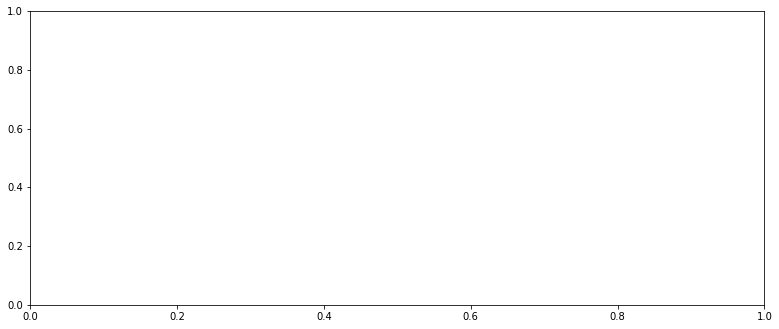

In [7]:
root_dir = f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/prec"
for region in ["Guercif", "Fes", "Taza", "Taounate", "Sefrou", "Yacoub"]:
    samples = pd.DataFrame(data=[])
    for year in range(2012, 2023):
        new_name = {f"prec_{i}":f"prec_{i+(year-2012)*12}" for i in range(1, 13)}
        try:
            prec = pd.read_csv(os.path.join(root_dir, f"{region}_prec_{year}.csv"))[[f"prec_{i}" for i in range(1, 13)]]
        except:
            prec = pd.DataFrame(data=[], columns=[f"prec_{i}" for i in range(1, 13)])
        prec.rename(columns=new_name, inplace=True)
        prec = prec.fillna(0)
        samples = pd.concat([samples, prec], axis=1)
    fig = plt.figure(1, figsize=(12, 6))
    plt.plot(range(0, len(samples.mean(axis=0))), samples.mean(axis=0) * 1000, label= "Precipitation", c="C1")
    ax = plt.gca()
    for l in ax.get_xticklabels() + ax.get_yticklabels():
        l.set_size(14)
        l.set_family('Arial')
        l.set_weight('bold')
    # ax.set_facecolor(np.array([230, 230, 230])/255)
    plt.legend(loc=1, prop=dict(size=14, family='Arial', weight='bold'))
    ax.set_ylabel('Precipitation', fontdict=dict(size=14, family='Arial', weight='bold'))
    ax.set_xlabel('Dates', fontdict=dict(size=14, family='Arial', weight='bold'))
    # ax.set_xlabel('Precipitation(mm)', fontdict=dict(size=14, family='Arial', weight='bold'))
    ax.set_xticks([0, 24, 48, 72, 96, 120])
    ax.set_ylim(0, 600)
    # ax.set_yticks([-0.4, -0.2, 0 ,0.2, 0.4])
    ax.set_xticklabels(["2012-01", "2014-01", "2016-01", "2018-01", "2020-01", "2022-01"], rotation=45)
    ax.grid(ls='--', color='k', lw=0.5)
    plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95)
    plt.savefig(f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis/figures/{region}_prec.jpg")
    plt.cla()

### Random Forest

In [167]:
root_dir =  f"/NAS6/Members/linchenxi/projects/morocco/irrigation_regional_analysis"
samples = pd.DataFrame(data=[])
for year in range(2012, 2023):
    combined_VI = pd.DataFrame(data=[])
    for vi in ["NDVI", "EVI"]:
        new_name = {f"{vi}_{i}":f"{vi}_{i+(year-2012)*12}" for i in range(1, 13)}
        try:
            if year == 2012 and vi == "NDVI":
                irri = pd.read_csv(os.path.join(root_dir, f"all_{vi}", f"all_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]]
            else:
                irri = pd.read_csv(os.path.join(root_dir, f"all_{vi}", f"all_{vi}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
        except:
            irri = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
        irri.rename(columns=new_name, inplace=True)
        irri = irri.fillna(0)
        try:
            if year == 2012 and vi == "NDVI":
                rf = pd.read_csv(os.path.join(root_dir, f"all_{vi}", f"all_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]+["FIELD_ID"]]
            else:
                rf = pd.read_csv(os.path.join(root_dir, f"all_{vi}", f"all_{vi}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]] 
        except:        
            rf = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
        rf.rename(columns=new_name, inplace=True)
        rf = rf.fillna(0)
        if year == 2012 and vi == "NDVI":
            irri["class"] = 0
            rf["class"] = 1
        combined = pd.concat([irri, rf], axis=0)
        combined_VI = pd.concat([combined_VI, combined], axis=1)
    samples = pd.concat([samples, combined_VI], axis=1)
samples_guercif = samples["FIELD_ID"].str.contains("GUERSIF")
samples_fes = samples["FIELD_ID"].str.contains("Fes-Nord")
samples_taounate = samples["FIELD_ID"].str.contains("TAOUNATE")
mask = np.any(np.c_[samples_guercif, samples_fes, samples_taounate], axis=1)
X_train = samples[mask].drop(columns=["class", "FIELD_ID"]).to_numpy()
y_train = samples[mask]["class"].to_numpy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
# X = samples.drop(columns=["class"]).to_numpy()
# y = samples["class"].to_numpy()
# cv = 5
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
clf = RandomForestClassifier(max_depth=5, random_state=1)
clf.fit(X_train, y_train)
# cv_results = cross_validate(clf, X_train, y_train, cv=5, return_estimator=True)
# estimators = cv_results["estimator"]
# scores = cv_results["test_score"]
# for e in estimators:
testing_region = ["Fes", 
               "Yacoub",
               "Sefrou",
               "Taza"
               ]
nickname = ["vi", "evi"]
for region in testing_region:
    testing_samples = pd.DataFrame(data=[])
    for year in range(2012, 2023):
        combined_VI = pd.DataFrame(data=[])
        for j, vi in enumerate(["NDVI", "EVI"]):
            new_name = {f"{vi}_{i}":f"{vi}_{i+(year-2012)*12}" for i in range(1, 13)}
            try:
                irri = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{nickname[j]}_irri_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
            except:
                irri = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
            irri.rename(columns=new_name, inplace=True)
            irri = irri.fillna(0)
            try:
                rf = pd.read_csv(os.path.join(root_dir, f"{vi}", f"{region}_{nickname[j]}_rf_{year}.csv"))[[f"{vi}_{i}" for i in range(1, 13)]]
            except:        
                rf = pd.DataFrame(data=[], columns=[f"{vi}_{i}" for i in range(1, 13)])
            rf.rename(columns=new_name, inplace=True)
            rf = rf.fillna(0)
            if year == 2012 and vi == "NDVI":
                irri["class"] = 0
                rf["class"] = 1
            combined = pd.concat([irri, rf], axis=0)
            combined_VI = pd.concat([combined_VI, combined], axis=1)
        testing_samples = pd.concat([testing_samples, combined_VI], axis=1)
    X_test = testing_samples.drop(columns=["class"]).to_numpy()
    y_test = testing_samples["class"].to_numpy()
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print ((y_pred==y_test).mean())
    print (f"{region}'s cm is {cm}")

0.25
Fes's cm is [[0 9]
 [0 3]]
0.8620689655172413
Yacoub's cm is [[ 0  4]
 [ 0 25]]
0.5523809523809524
Sefrou's cm is [[ 8  6]
 [41 50]]
0.6698113207547169
Taza's cm is [[ 4  8]
 [27 67]]
